# ****Importing Libraries****

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import joblib
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

**Librosa** is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems. By using Librosa, we can extract certain key features from the audio samples such as Tempo, Chroma Energy Normalized, Mel-Freqency Cepstral Coefficients, Spectral Centroid, Spectral Contrast, Spectral Rolloff, and Zero Crossing Rate.

**IPython.display.Audio** we can play audio in the notebook. It is a library used for playing the audio in the jupyterlab.

# **Reading the data from the dataset by setting the path**

In [2]:
df=pd.read_csv('Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')
#for testing on google colab

# **Data preprocessing**

In [3]:
df.shape

(9990, 60)

In [7]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

# **Dropping the unwanted labels**

In [4]:
df=df.drop(labels='filename',axis=1)

# **Understanding the Audio Files**

In [5]:
audio_recording="Data/genres_original/country/country.00050.wav"
data , sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [6]:
librosa.load(audio_recording, sr=45600)

(array([ 0.04446705,  0.06373049,  0.05768819, ..., -0.13878523,
        -0.11868108, -0.05903753], dtype=float32),
 45600)

data, sr = librosa.load(audio_recording)
It loads and decodes the audio as a time series y.
sr = sampling rate of y. It is the number of samples per second. 20 kHz is the audible range for human beings. So it is used as the default value for sr. In this code we are using sr as 45600Hz.


# **Spectrogram visualization**




A spectrogram is a visual way of representing the signal loudness of a signal over time at various frequencies present in a particular waveform

C:\Users\Admin\AppData\Local\Temp\ipykernel_16872\2260726204.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')


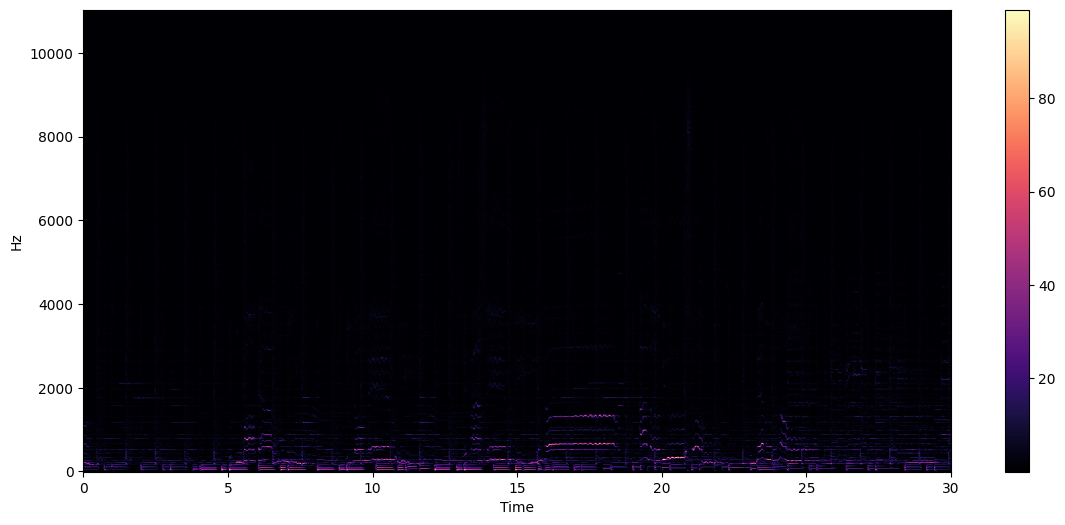

In [7]:
stft =librosa.stft(data)
stft_db =librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

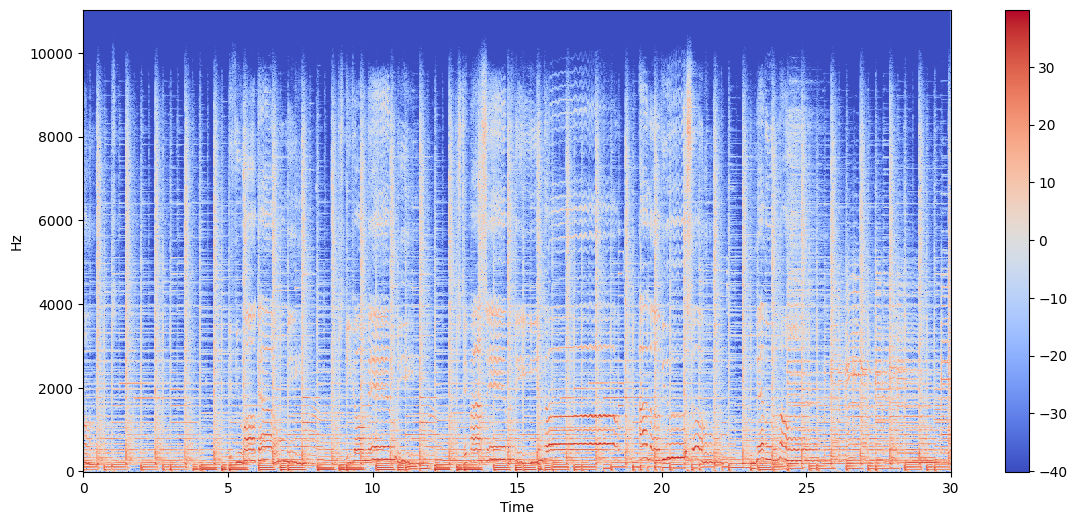

In [8]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

**Spectral Rolloff** is the frequency below which a specified percentage of the total spectral energy, e.g. 85%

librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal.

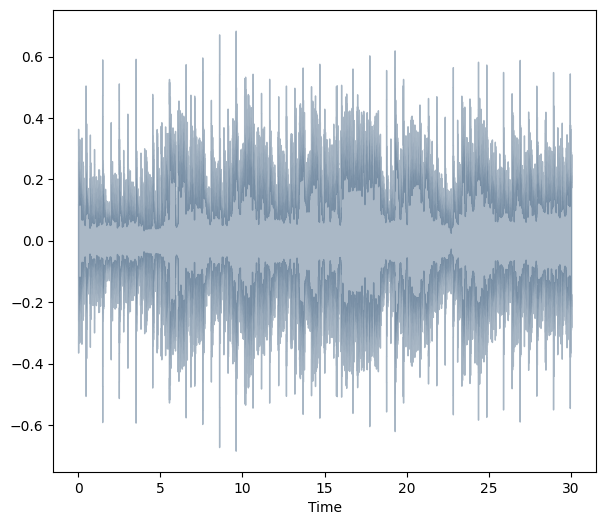

In [9]:
spectral_rolloff=librosa.feature.spectral_rolloff(y=data,sr=sr)[0]
plt.figure(figsize=(7,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color="#2B4F72")

**Chroma Feature**


It is a powerful tool for analyzing music features whose pitches can be meaningfully categorized and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music while being robust to changes in timbre and instrumentation.

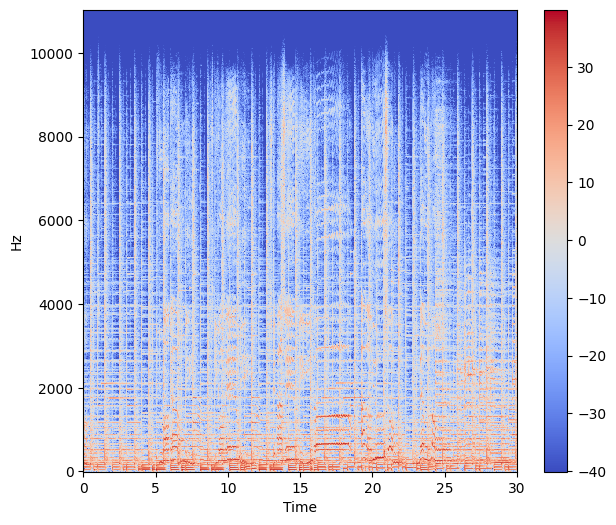

In [10]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(7,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

**Zero crossing** is said to occur if successive samples have different algebraic signs. The rate at which zero-crossings occur is a simple measure of the frequency content of a signal. Zero-crossing rate is a measure of the number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero.



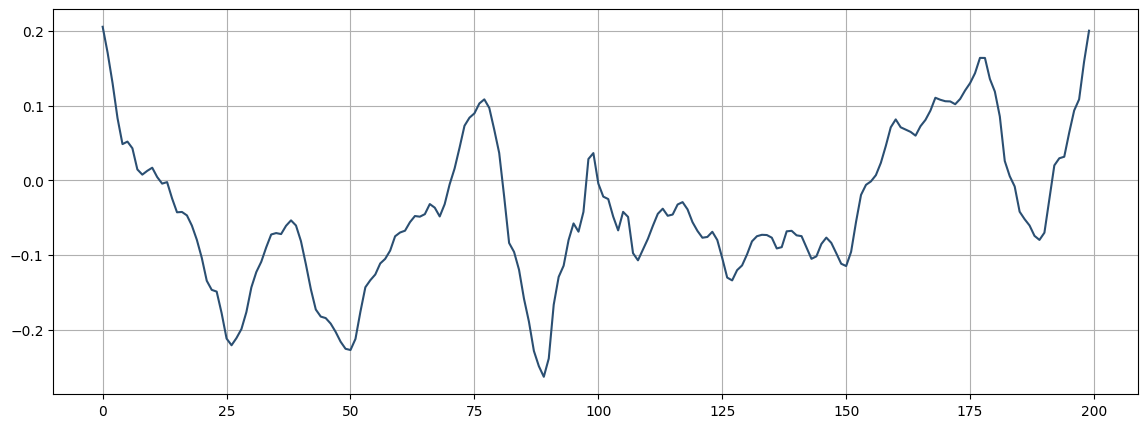

In [11]:
start=1000
end=1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

In [12]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("The number of zero-crossings is:",sum(zero_cross_rate))

The number of zero-crossings is: 8


# **Feature Extraction**

On the last column  is ‘label’ and will encode it with the function LabelEncoder() of sklearn.preprocessing. 

In [13]:
class_list=df.iloc[:,-1]
convertor = LabelEncoder()

**fit_transform():** Fit label encoder and return encoded labels.

In [14]:
y=convertor.fit_transform(class_list)
np.save("classes.npy", convertor.classes_)#save class.npy

In [16]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [15]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

# **Scaling the Features**

Standard scaler is used to standardize features by removing the mean and scaling to unit variance.

The standard score of sample x is calculated as:

z = (x - u) / s

In [16]:
from sklearn.preprocessing import StandardScaler

fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))


In [ ]:
# from joblib import dump
# dump(fit, 'scaler.joblib')#to save the scaler

In [17]:
X.shape

(9990, 58)

# **Dividing Data Into Training and Testing Sets**

In [18]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)


In [19]:
len(y_train)

6693

In [20]:
len(y_test)

3297

# **Building the Model**

Now comes the last part of the music classification genre project. The features have been extracted from the raw data and now we have to train the model. There are many ways through which we can train our model. Some of these approaches are:

* Multiclass Support Vector Machines
* K-Means Clustering
* K-Nearest Neighbors
* Convolutional Neural Networks

we will be using CNN Algorithm for training our model. We chose this approach because various forms of research show it to have the best results for this problem.

In [21]:
from keras.models import Sequential

In [23]:
def trainModel(model,epochs,optimizer):
    batch_size =128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy'
    )
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [24]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.Dataframe(history.history).plot(figsize=(12,6))
    plt.show()

In [25]:
import keras as k

In [26]:
model=k.models.Sequential([
    k.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    k.layers.Dense(256,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(128,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(64,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(10,activation='softmax'),   
])
print(model.summary())
model_history=trainModel(model=model,epochs=600,optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

For the CNN model, we had used the Adam optimizer for training the model. The epoch that was chosen for the training model is 600.

All of the hidden layers are using the RELU activation function and the output layer uses the softmax function. The loss is calculated using the sparse_categorical_crossentropy function.

Dropout is used to prevent overfitting.

We chose the Adam optimizer because it gave us the best results after evaluating other optimizers.

The model accuracy can be increased by further increasing the epochs but after a certain period, we may achieve a threshold, so the value should be determined accordingly.

# **Model Evaluation**

In [27]:
test_loss, test_acc = model.evaluate(X_test,y_test,batch_size=128)
print("The test Loss is:",test_loss)
print("\nThe Best test Accuracy is:",test_acc*100)
# model.save("my_model.h5")

26/26 [==============================] - 0s 3ms/step - loss: 0.5988 - accuracy: 0.9245
The test Loss is: 0.5987808108329773

The Best test Accuracy is: 92.44768023490906


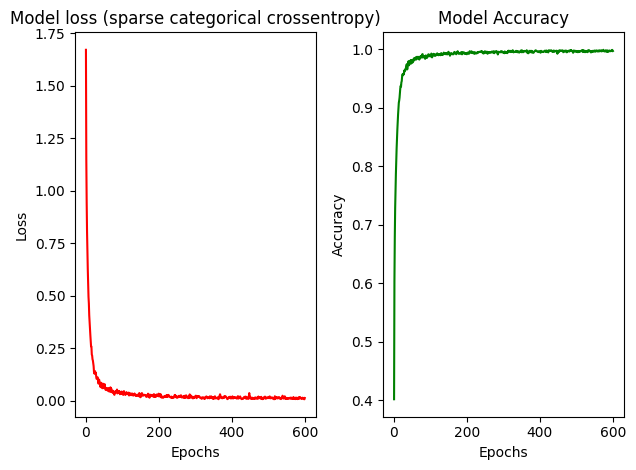

In [29]:
#training plots
epochs = np.arange(1,601)
plt.subplot(1,2,1)
plt.plot(epochs,model_history.history['loss'],color='r')
plt.title('Model loss (sparse categorical crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(epochs,model_history.history['accuracy'],color='g')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [31]:
#confuction matrix
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
preds = []
for i in pred:
    out = np.argmax(i)
    preds.append(out)
cm = confusion_matrix(y_test,preds)



104/104 [==============================] - 0s 2ms/step


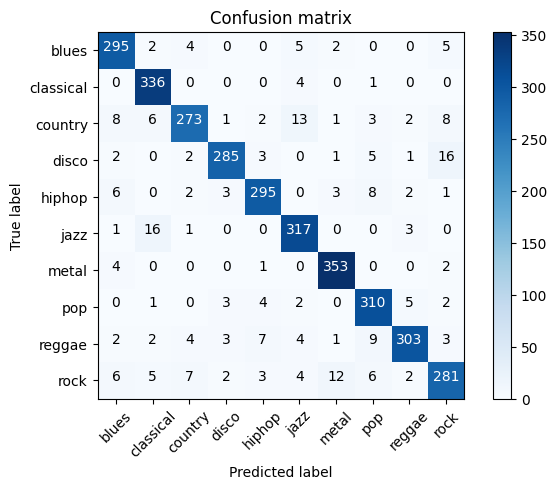

In [32]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
classes=convertor.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
##validation
print(model.layers[0].input_shape)
def predict(model,X,Y):
    X=X[np.newaxis, ...]
    prediction=model.predict(X)
    print(prediction)
    predicted_index=np.argmax(prediction,axis=1)
    print("expected index :",Y)
    print("predicted index :",predicted_index)
#testing
X=X_test[150]#just a random song
Y=y_test[150]
predict(model,X,Y)#predicting its genre

(None, 58)
1/1 [==============================] - 0s 29ms/step
[[4.5491139e-19 1.5152566e-22 6.6443525e-32 1.2763106e-21 8.2554399e-26
  3.6854202e-33 1.0000000e+00 2.0430010e-31 2.6620731e-26 5.8688320e-18]]
expected index : 6
predicted index : [6]


In [33]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
import numpy as np
import librosa
from joblib import load

# load the trained model
model = keras.models.load_model('my_model.h5')
le = LabelEncoder()
le.classes_ = np.load('classes.npy',allow_pickle=True)
fit=load('scaler.joblib')
# print(le.classes_)

# create a function to extract features from an audio file
def extract_features(filename):
    y, sr = librosa.load(filename,duration=30)
    length=66149
    chroma_stft_mean = librosa.feature.chroma_stft(y=y, sr=sr).mean()
    chroma_stft_var = librosa.feature.chroma_stft(y=y, sr=sr).var()
    rms_mean = librosa.feature.rms(y=y).mean()
    rms_var = librosa.feature.rms(y=y).var()
    spectral_centroid_mean = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_centroid_var = librosa.feature.spectral_centroid(y=y, sr=sr).var()
    spectral_bandwidth_mean = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    spectral_bandwidth_var = librosa.feature.spectral_bandwidth(y=y, sr=sr).var()
    rolloff_mean = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    rolloff_var = librosa.feature.spectral_rolloff(y=y, sr=sr).var()
    zero_crossing_rate_mean = librosa.feature.zero_crossing_rate(y=y).mean()
    zero_crossing_rate_var = librosa.feature.zero_crossing_rate(y=y).var()
    y_harmonic = librosa.effects.harmonic(y)
    harmony_mean = np.mean(y_harmonic)
    harmony_var = np.var(y_harmonic)
    y_percussive = librosa.effects.percussive(y)
    perceptr_mean = np.mean(y_percussive)
    perceptr_var = np.var(y_percussive)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfcc1_mean = mfccs[0].mean()
    mfcc1_var = mfccs[0].var()
    mfcc2_mean = mfccs[1].mean()
    mfcc2_var = mfccs[1].var()
    mfcc3_mean = mfccs[2].mean()
    mfcc3_var = mfccs[2].var()
    mfcc4_mean = mfccs[3].mean()
    mfcc4_var = mfccs[3].var()
    mfcc5_mean = mfccs[4].mean()
    mfcc5_var = mfccs[4].var()
    mfcc6_mean = mfccs[5].mean()
    mfcc6_var = mfccs[5].var()
    mfcc7_mean = mfccs[6].mean()
    mfcc7_var = mfccs[6].var()
    mfcc8_mean = mfccs[7].mean()
    mfcc8_var = mfccs[7].var()
    mfcc9_mean = mfccs[8].mean()
    mfcc9_var = mfccs[8].var()
    mfcc10_mean = mfccs[9].mean()
    mfcc10_var = mfccs[9].var()
    mfcc11_mean = mfccs[10].mean()
    mfcc11_var = mfccs[10].var()
    mfcc12_mean = mfccs[11].mean()
    mfcc12_var = mfccs[11].var()
    mfcc13_mean = mfccs[12].mean()
    mfcc13_var = mfccs[12].var()
    mfcc14_mean = mfccs[13].mean()
    mfcc14_var = mfccs[13].var()
    mfcc15_mean =mfccs[14].mean()
    mfcc15_var = mfccs[14].var()
    mfcc16_mean =  mfccs[15].mean()
    mfcc16_var = mfccs[15].var()
    mfcc17_mean = mfccs[16].mean()
    mfcc17_var = mfccs[16].var()
    mfcc18_mean = mfccs[17].mean()
    mfcc18_var = mfccs[17].var()
    mfcc19_mean = mfccs[18].mean()
    mfcc19_var =mfccs[18].var()
    mfcc20_mean = mfccs[19].mean()
    mfcc20_var = mfccs[19].var()

    features = np.array([length,chroma_stft_mean, chroma_stft_var, rms_mean, rms_var, spectral_centroid_mean,
                         spectral_centroid_var, spectral_bandwidth_mean, spectral_bandwidth_var, rolloff_mean,
                         rolloff_var, zero_crossing_rate_mean, zero_crossing_rate_var ,harmony_mean, harmony_var,perceptr_mean, perceptr_var,
                         tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,
                         mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,
                         mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var
                         ,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,
                         mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var])
    return features

# create a function to classify an audio file
def classify_audio():
    filename = filedialog.askopenfilename()
    if filename:
        X = extract_features(filename)
        X = np.expand_dims(X, axis=0)# to fix input shape so it can be taken as input by model
        X=fit.transform(X)#transforemed  to the scale that we fitted above
        #print(X)#for debuggin remove later
        y_pred = model.predict(X)
        #print(y_pred)
        predicted_index=le.classes_[np.argmax(y_pred,axis=1)]
        #print(predicted_index)
        global predicted_genre
        predicted_genre=predicted_index[0]
        

        result_label = tk.Label(window, text='The genre for you music is',font=("Helvetica",20))
        result_label.pack()
        # create a label for displaying the classification result
        result_label = tk.Label(window, text=predicted_genre,font=("Helvetica",20))
        result_label.pack(pady=20)



# create a tkinter window
window = tk.Tk()
window.geometry("900x600")
window.title('Audio Genre Classification')


# create a file loading button
load_button = tk.Button(window, text='Load Audio File', command=classify_audio)#from here it goes to classify audio function
load_button.pack(pady=20)




# start the GUI
window.mainloop()

1/1 [==============================] - 0s 69ms/step
